In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./train.csv')
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
df.shape

(750000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [ ]:
df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [ ]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  int64  
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 51.5 MB


<Axes: >

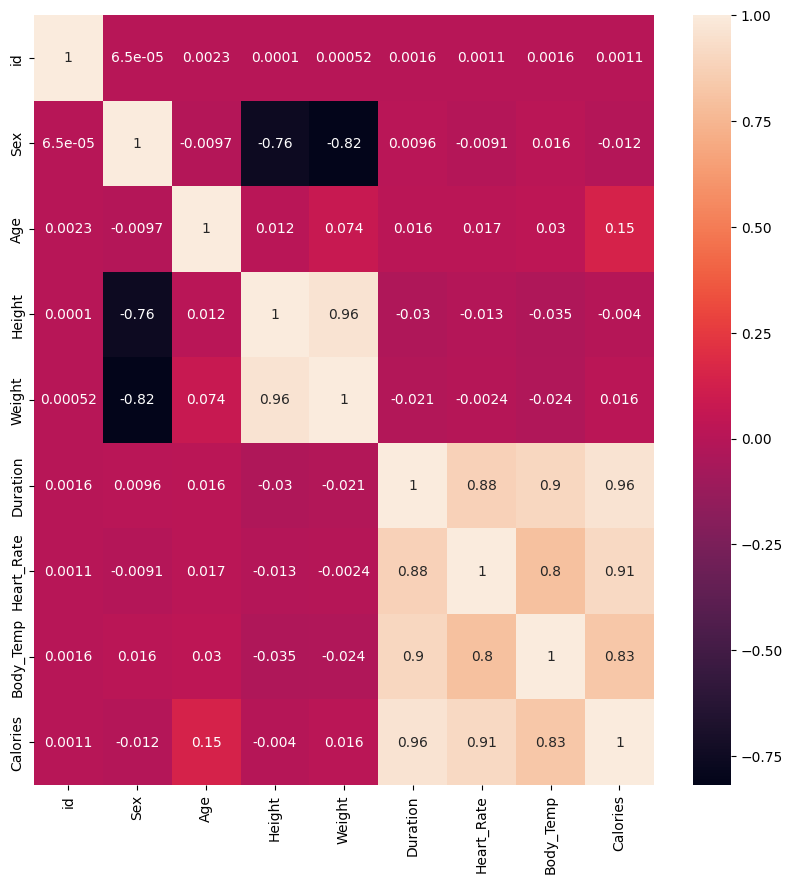

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# sns.pairplot(df)

In [ ]:
df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

<Axes: ylabel='Height'>

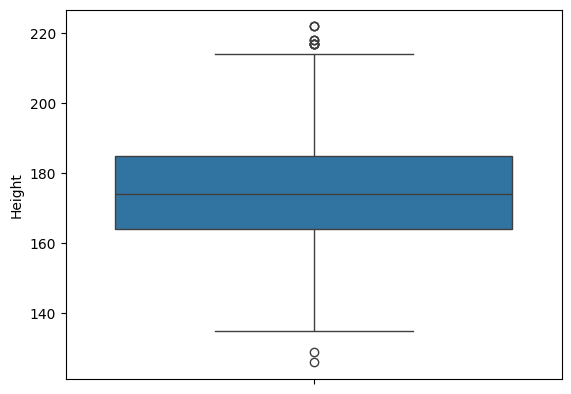

In [ ]:
sns.boxplot(df['Height'])

In [ ]:
def remove_outliers(col: str, df: pd.DataFrame) -> pd.DataFrame:
  q1 = df[col].quantile(0.25)
  q2 = df[col].quantile(0.75)
  iqr = q2 - q1
  lb = q1 - 1.5*iqr
  ub = q1 + 1.5*iqr

  return df[(df[col] >= lb) & (df[col] <= ub)]

(715487, 9)


<Axes: ylabel='Height'>

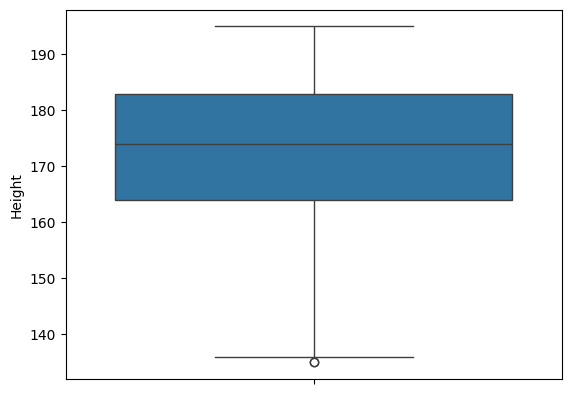

In [ ]:
df1 = remove_outliers('Height', df)
print(df1.shape)
sns.boxplot(df1['Height'])

In [ ]:
cols = ['Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Height']

In [ ]:
for col in cols:
  df1 = remove_outliers(col, df1)
  print(df1.shape)

(689103, 9)
(689103, 9)
(651390, 9)
(631507, 9)
(607891, 9)


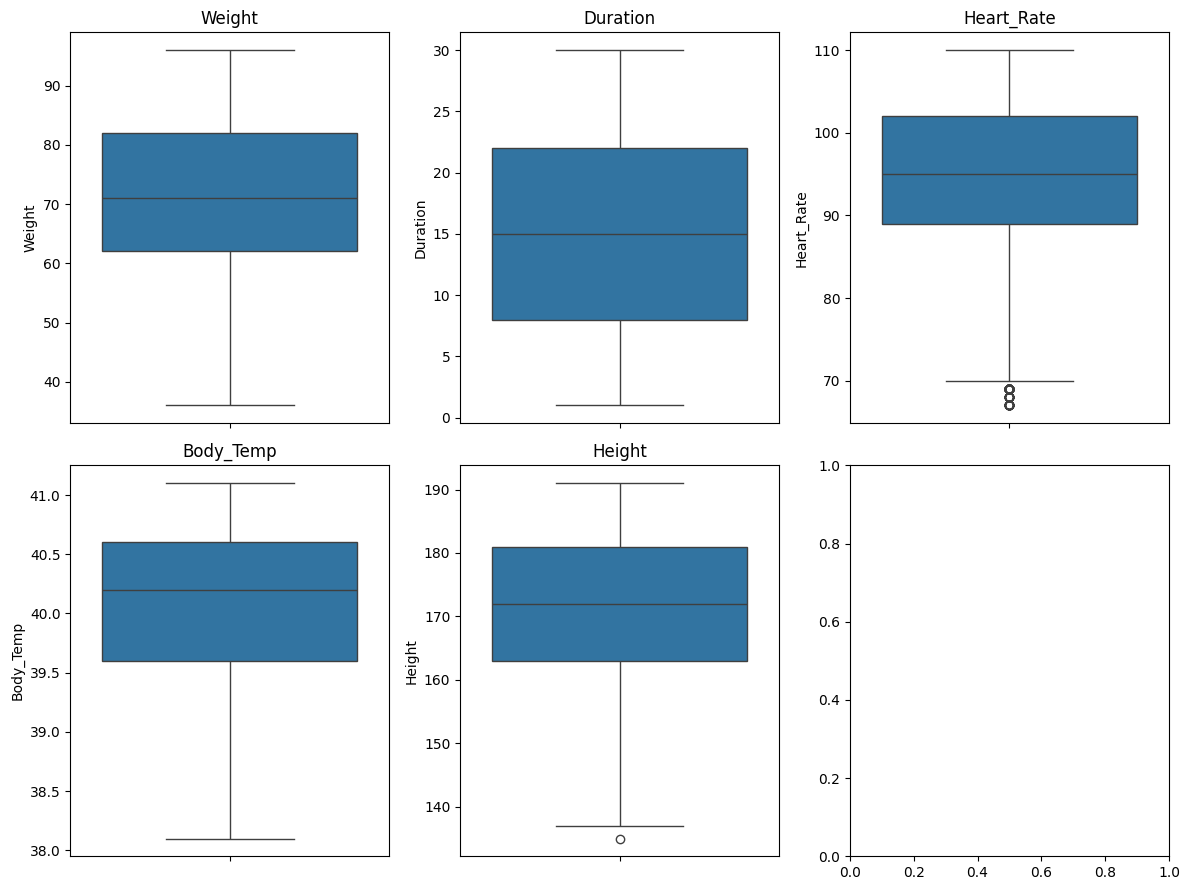

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,9))
axs = axs.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df1[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
df1.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

X = df1.drop(['Calories', 'id'], axis=1)
y = df1['Calories']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9711659907946618

In [ ]:
y_pred = model.predict(X_test)
print(len(y_pred[y_pred < 0]))
y_pred[y_pred < 0] = 0
mean_squared_log_error(y_test, y_pred)

3814


0.2361446616366723

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.86785039,  1.70266834, -1.08451018, ...,  1.013998  ,
         1.32830292,  0.94709241],
       [ 0.86785039, -0.54794408, -1.81266078, ..., -0.52526403,
         0.37808764, -0.51088507],
       [ 0.86785039, -0.4817496 , -1.35756666, ...,  1.14226983,
         0.97197219,  1.23868791],
       ...,
       [ 0.86785039, -0.8789165 , -1.81266078, ...,  1.91190085,
         1.32830292,  1.09289016],
       [ 0.86785039, -0.81272201,  1.64605459, ...,  0.11609515,
         0.49686455,  0.07230592],
       [-1.15227234,  0.57736213,  0.91790398, ..., -1.29489504,
        -1.04723527, -1.38567157]])

In [ ]:
model = Ridge()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(len(y_pred[y_pred < 0]))

print(model.score(X_test_scaled, y_test))

msle = mean_squared_log_error(y_test, y_pred)
print("MSLE:", msle)

3814
0.9711659797447281


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain values less than or equal to -1.

In [ ]:
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
categorical_features = ['Sex']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder


preprocessor = ColumnTransformer(
    transformers=[
        ("StandardScaler",StandardScaler(),numerical_features),
        ("OneHotEncoder",OneHotEncoder(sparse_output=False,dtype=int,handle_unknown='ignore'),categorical_features)
    ]
,remainder='passthrough')

In [ ]:
X_train_trf = preprocessor.fit_transform(X_train)
X_test_trf = preprocessor.transform(X_test)

In [ ]:
model.fit(X_train_trf, y_train)
model.score(X_test_trf, y_test)

0.9711659797826417

In [ ]:
mean_squared_log_error(y_test, np.clip(model.predict(X_test_trf), 1, 314))

0.14977988579874327

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Ensure you have already transformed your data
# X_train_trf = preprocessor.fit_transform(X_train)
# X_test_trf = preprocessor.transform(X_test)

# Define models
models = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=100, random_state=42, verbose=0),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_trf, y_train)
    y_pred = model.predict(X_test_trf)
    y_pred = np.clip(y_pred, 1, 314)  # Clipping to avoid negative values
    msle = mean_squared_log_error(y_test, y_pred)
    print(f"{name} MSLE: {msle:.5f}")


XGBoost MSLE: 0.00355


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 486312, number of used features: 8
[LightGBM] [Info] Start training from score 83.007028


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM MSLE: 0.00367
CatBoost MSLE: 0.00366
GradientBoosting MSLE: 0.00825
AdaBoost MSLE: 0.26503


id            0.001148
Sex          -0.012011
Age           0.145683
Height       -0.004026
Weight        0.015863
Duration      0.959908
Heart_Rate    0.908748
Body_Temp     0.828671
Name: Calories, dtype: float64


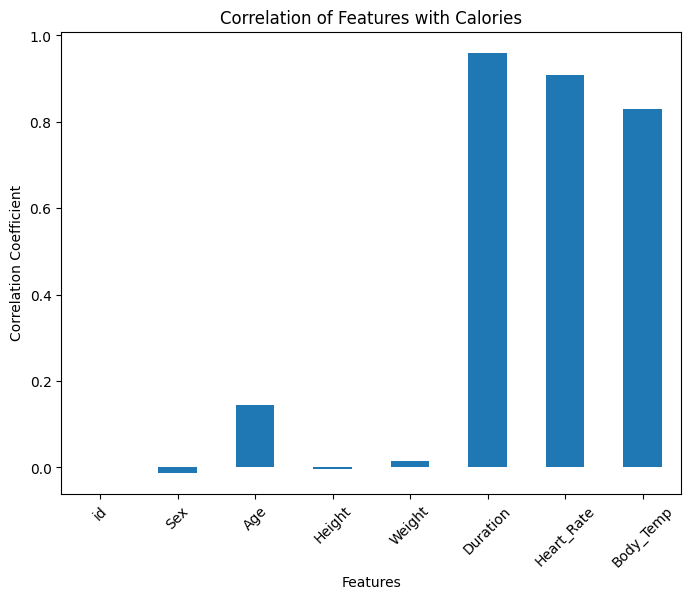

In [ ]:
correlation_with_calories = df.corr()['Calories'].drop('Calories')

# Print the correlations
print(correlation_with_calories)

# Visualize the correlations (optional)
plt.figure(figsize=(8, 6))
correlation_with_calories.plot(kind='bar')
plt.title('Correlation of Features with Calories')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [ ]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [ ]:
X_submission = preprocessor.transform(test_df)

submission_preds = models['XGBoost'].predict(X_submission)

submission_preds = np.clip(submission_preds, 1, 314)

submission_df = pd.DataFrame({
    'id': test_df.id,
    'Calories': submission_preds
})
submission_df.head()

,id,Calories
0,750000,27.885841
1,750001,108.043594
2,750002,83.384361
3,750003,125.120911
4,750004,76.210838


In [ ]:
submission_df.to_csv('submission.csv', index=False)